In [1]:
!pip install qiskit
!pip install pylatexenc
!pip install qiskit_machine_learning

  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 68.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from qiskit import Aer
print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator'), PulseSimulator('pulse_simulator')]


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier

# TensorFlow Libraries for Deep Learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Qiskit Libraries for Quantum Computing
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.algorithms import QSVC

In [4]:
# Load Dataset
file_path = "/kaggle/input/-nutritionalfacts-fruit-vegetables-seafood/NutritionalFacts_Fruit_Vegetables_Seafood.csv"  # Update with your file path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [5]:
# Data Cleaning
data.columns = data.columns.str.replace(r'[^\w\s]', '', regex=True).str.strip().str.replace(' ', '_')
data = data[pd.to_numeric(data['Calories'], errors='coerce').notnull()]
numeric_columns = ['Calories', 'Sodium', 'Potassium', 'Total_Carbohydrate', 'Dietary_Fiber', 'Sugars',
                   'Protein', 'Vitamin_A', 'Vitamin_C', 'Calcium']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(thresh=len(data.columns) - 5)
data['Food_Type_Encoded'] = LabelEncoder().fit_transform(data['Food_Type'])

In [6]:
# Feature Selection and Scaling
features = ['Sodium', 'Potassium', 'Total_Carbohydrate', 'Protein', 'Vitamin_A', 'Vitamin_C', 'Calcium']
X = data[features]
y_calories = data['Calories']
y_food_type = data['Food_Type_Encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train_calories, y_test_calories = train_test_split(X_scaled, y_calories, test_size=0.2, random_state=42)
_, _, y_train_type, y_test_type = train_test_split(X_scaled, y_food_type, test_size=0.2, random_state=42)

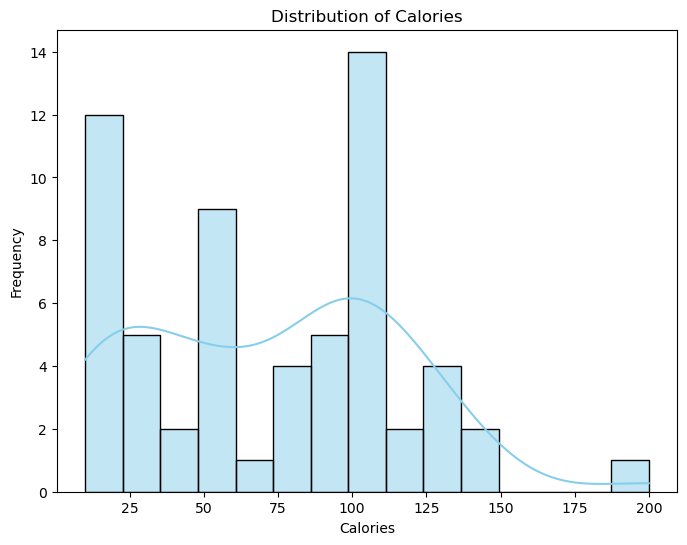

In [7]:
# EDA
# 1. Distribution of Calories
plt.figure(figsize=(8, 6))
sns.histplot(data['Calories'], kde=True, bins=15, color="skyblue")
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()

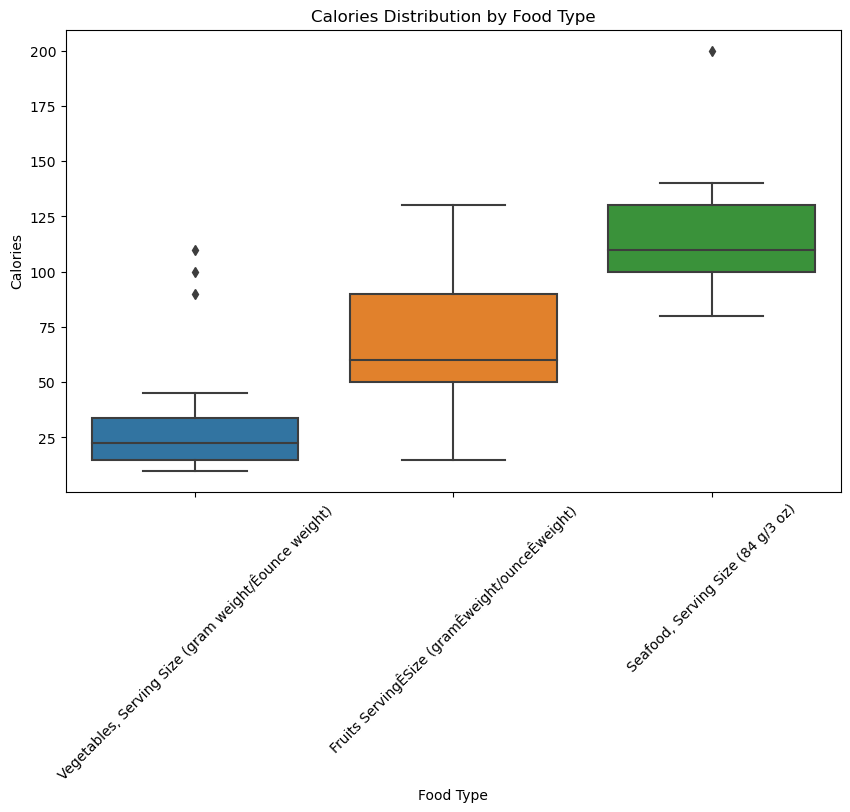

In [8]:
# 2. Comparison of Nutrients by Food Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Food_Type', y='Calories', data=data)
plt.title("Calories Distribution by Food Type")
plt.xlabel("Food Type")
plt.ylabel("Calories")
plt.xticks(rotation=45)
plt.show()

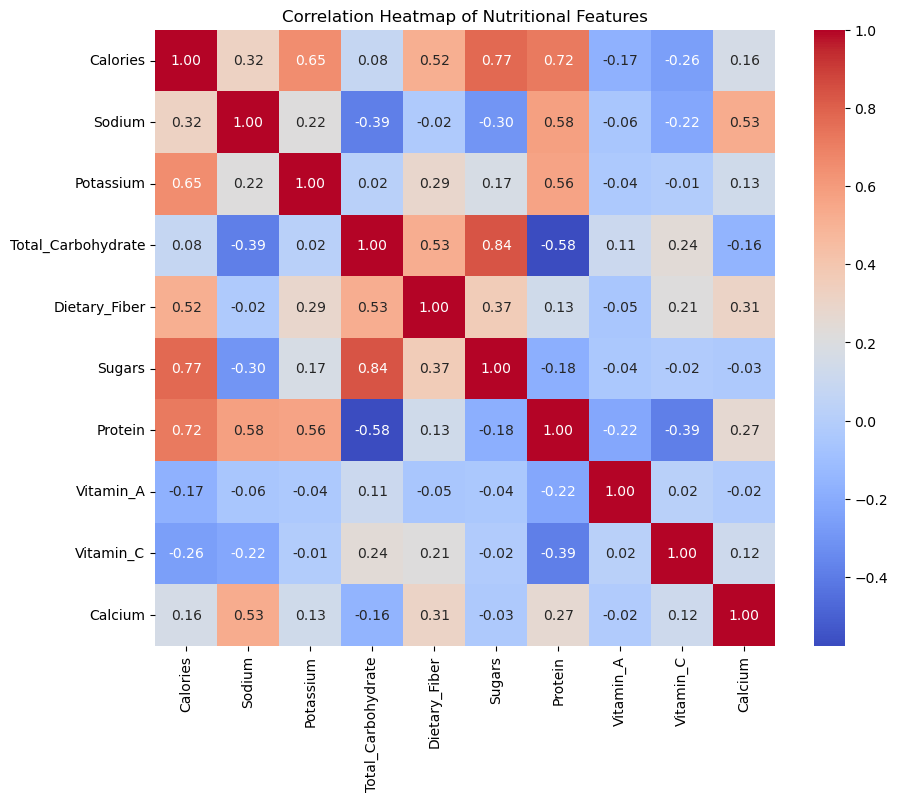

In [9]:
# 3. Correlation Heatmap for Numeric Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numeric_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Nutritional Features")
plt.show()

In [10]:
# --- Machine Learning Models ---
# Regression (Random Forest)
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train_calories)
y_pred_calories = regressor.predict(X_test)
print("Regression - MSE:", mean_squared_error(y_test_calories, y_pred_calories))
print("Regression - R2:", r2_score(y_test_calories, y_pred_calories))

Regression - MSE: 828.1675
Regression - R2: 0.4926216875113286


In [11]:
# Classification (Decision Tree)
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train_type)
y_pred_type = classifier.predict(X_test)
print("Classification - Accuracy:", accuracy_score(y_test_type, y_pred_type))
print("Classification Report:\n", classification_report(y_test_type, y_pred_type))

Classification - Accuracy: 0.8461538461538461
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      1.00      1.00         5
           2       1.00      0.60      0.75         5

    accuracy                           0.85        13
   macro avg       0.87      0.87      0.83        13
weighted avg       0.91      0.85      0.85        13



In [12]:
# --- Deep Learning Models ---
# Deep Learning - Regression
regression_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])
regression_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])
regression_model.fit(X_train, y_train_calories, epochs=50, batch_size=8, verbose=0)
y_pred_calories_dl = regression_model.predict(X_test).flatten()
print("DL Regression - MSE:", mean_squared_error(y_test_calories, y_pred_calories_dl))
print("DL Regression - R2:", r2_score(y_test_calories, y_pred_calories_dl))

1/1 [==============================] - 0s 95ms/step
DL Regression - MSE: 160.17534933223914
DL Regression - R2: 0.9018682833527337


In [13]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# Initialize the OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

# Convert Pandas Series to NumPy arrays and reshape
y_train_type_onehot = one_hot_encoder.fit_transform(y_train_type.to_numpy().reshape(-1, 1))
y_test_type_onehot = one_hot_encoder.transform(y_test_type.to_numpy().reshape(-1, 1))

# Build and train the classification model
classification_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(one_hot_encoder.categories_[0]), activation='softmax')  # Output layer for classification
])
classification_model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
classification_model.fit(X_train, y_train_type_onehot, epochs=50, batch_size=8, verbose=0)

# Evaluate the model
classification_loss, classification_accuracy_dl = classification_model.evaluate(X_test, y_test_type_onehot, verbose=0)
print("DL Classification - Accuracy:", classification_accuracy_dl)


DL Classification - Accuracy: 0.9230769276618958


In [14]:
pip install qiskit qiskit-machine-learning --upgrade

  Using cached qiskit-0.44.0.tar.gz (8.9 kB)
  Installing build dependencies ... - \ | done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ done
  Preparing metadata (pyproject.toml) ... - done
Note: you may need to restart the kernel to use updated packages.


In [15]:
# # --- Quantum Computing Models ---
# # Scaling for Quantum
# scaler_quantum = MinMaxScaler()
# X_train_q = scaler_quantum.fit_transform(X_train)
# X_test_q = scaler_quantum.transform(X_test)

In [16]:
from qiskit import Aer
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# # Define Quantum Feature Map
# num_features = X_train_q.shape[1]  # Number of features in your dataset
# feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)

# # Initialize the Sampler
# sampler = Sampler()

# # Define the Quantum Kernel
# quantum_kernel = QuantumKernel(feature_map=feature_map, sampler=sampler)

# # Use the Quantum Kernel with a Classical SVC
# qsvc = SVC(kernel=quantum_kernel.evaluate)

# # Train the QSVC
# qsvc.fit(X_train_q, y_train_type)

# # Predict and Evaluate
# y_pred_qsvc = qsvc.predict(X_test_q)
# quantum_accuracy = accuracy_score(y_test_type, y_pred_qsvc)

# print(f"Quantum Classification Accuracy: {quantum_accuracy:.2f}")


In [17]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.optimizers import Adam
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import Sampler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from qiskit_machine_learning.kernels import QuantumKernel
from qiskit_machine_learning.algorithms import VQC

In [18]:
# Load Dataset
file_path = "/kaggle/input/-nutritionalfacts-fruit-vegetables-seafood/NutritionalFacts_Fruit_Vegetables_Seafood.csv"  # Update with your dataset path
data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [19]:
# Data Cleaning
data.columns = data.columns.str.replace(r'[^\w\s]', '', regex=True).str.strip().str.replace(' ', '_')
data = data[pd.to_numeric(data['Calories'], errors='coerce').notnull()]
numeric_columns = ['Calories', 'Sodium', 'Potassium', 'Total_Carbohydrate', 'Dietary_Fiber', 'Sugars',
                   'Protein', 'Vitamin_A', 'Vitamin_C', 'Calcium']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
data = data.dropna(thresh=len(data.columns) - 5)
data['Food_Type_Encoded'] = LabelEncoder().fit_transform(data['Food_Type'])

In [20]:
# Feature Selection and Scaling
features = ['Sodium', 'Potassium', 'Total_Carbohydrate', 'Protein', 'Vitamin_A', 'Vitamin_C', 'Calcium']
X = data[features]
y_calories = data['Calories']
y_food_type = data['Food_Type_Encoded']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train_calories, y_test_calories = train_test_split(X_scaled, y_calories, test_size=0.2, random_state=42)
_, _, y_train_type, y_test_type = train_test_split(X_scaled, y_food_type, test_size=0.2, random_state=42)

In [21]:
# --- Machine Learning Complex Models ---
# Gradient Boosting for Regression
gb_regressor = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gb_regressor.fit(X_train, y_train_calories)
y_pred_calories_gb = gb_regressor.predict(X_test)
regression_mse_gb = mean_squared_error(y_test_calories, y_pred_calories_gb)
regression_r2_gb = r2_score(y_test_calories, y_pred_calories_gb)

In [22]:
# Random Forest with Hyperparameter Tuning for Classification
rf_classifier = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10], 'min_samples_split': [2, 5]}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train_type)
best_rf_classifier = grid_search.best_estimator_
y_pred_type_rf = best_rf_classifier.predict(X_test)
classification_accuracy_rf = accuracy_score(y_test_type, y_pred_type_rf)

In [23]:
# --- Deep Learning Complex Models ---
# Fully Connected Neural Network for Regression
regression_model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])
regression_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
regression_model.fit(X_train, y_train_calories, epochs=100, batch_size=16, verbose=0)
y_pred_calories_dl = regression_model.predict(X_test).flatten()
regression_mse_dl = mean_squared_error(y_test_calories, y_pred_calories_dl)
regression_r2_dl = r2_score(y_test_calories, y_pred_calories_dl)

1/1 [==============================] - 0s 60ms/step


In [24]:
# Convolutional Neural Network for Classification
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
classification_model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(np.unique(y_train_type)), activation='softmax')  # Output layer for classification
])
classification_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classification_model.fit(X_train_cnn, y_train_type, epochs=100, batch_size=16, verbose=0)
classification_accuracy_cnn = classification_model.evaluate(X_test_cnn, y_test_type, verbose=0)[1]

In [25]:
# --- Quantum Computing Complex Models ---
# Quantum Kernel for Classification
feature_map = ZZFeatureMap(feature_dimension=X_train.shape[1], reps=3, entanglement='full')
backend = Aer.get_backend('statevector_simulator')
quantum_instance = QuantumInstance(backend=backend, shots=1024, seed_simulator=42, seed_transpiler=42)
quantum_kernel = QuantumKernel(feature_map=feature_map, quantum_instance=quantum_instance)
qsvc = SVC(kernel=quantum_kernel.evaluate)
qsvc.fit(X_train, y_train_type)
y_pred_qsvc = qsvc.predict(X_test)
quantum_accuracy_qsvc = accuracy_score(y_test_type, y_pred_qsvc)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: The class ``qiskit.utils.quantum_instance.QuantumInstance`` is deprecated as of qiskit-terra 0.24.0. It will be removed no earlier than 3 months after the release date. For code migration guidelines, visit https://qisk.it/qi_migration.
  """


In [26]:
from qiskit import Aer
from qiskit.primitives import Sampler
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms import VQC
from qiskit.algorithms.optimizers import COBYLA
from sklearn.metrics import accuracy_score, classification_report

# Define the Quantum Feature Map and Ansatz
num_qubits = X_train.shape[1]  # Number of qubits matches feature dimensions
feature_map = ZZFeatureMap(feature_dimension=num_qubits, reps=2, entanglement='linear')
ansatz = RealAmplitudes(num_qubits, reps=2)

# Replace quantum_instance with Sampler
sampler = Sampler()

# Variational Quantum Classifier (VQC)
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    sampler=sampler,
)

# Convert labels to NumPy arrays
y_train_type_vqc = y_train_type.to_numpy()
y_test_type_vqc = y_test_type.to_numpy()

# Fit the model
vqc.fit(X_train, y_train_type_vqc)

# Predict and Evaluate
y_pred_vqc = vqc.predict(X_test)
test_accuracy = accuracy_score(y_test_type_vqc, y_pred_vqc)

print(f"VQC Test Accuracy: {test_accuracy:.2f}")
print("Classification Report:\n", classification_report(y_test_type_vqc, y_pred_vqc))


VQC Test Accuracy: 0.38
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.44      0.80      0.57         5
           2       1.00      0.20      0.33         5

    accuracy                           0.38        13
   macro avg       0.48      0.33      0.30        13
weighted avg       0.56      0.38      0.35        13



In [27]:
from qiskit.circuit.library import RealAmplitudes
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.neural_networks import CircuitQNN
from qiskit.algorithms.optimizers import COBYLA

# Define the Ansatz (parameterized quantum circuit)
ansatz = RealAmplitudes(num_qubits=X_train.shape[1], reps=3)

# Define Quantum Neural Network
qnn = CircuitQNN(
    circuit=ansatz,
    input_params=ansatz.parameters[:X_train.shape[1]],  # First few parameters are input features
    weight_params=ansatz.parameters[X_train.shape[1]:],  # Remaining are trainable weights
    quantum_instance=quantum_instance,
)

# Define Variational Quantum Classifier
vqc = VQC(
    feature_map=feature_map,
    ansatz=ansatz,
    optimizer=COBYLA(maxiter=200),
    quantum_instance=quantum_instance,
)

# Fit the model
vqc.fit(X_train, y_train_type_vqc)

# Predict and Evaluate
y_pred_vqc = vqc.predict(X_test)
quantum_accuracy_vqc = accuracy_score(y_test_type_vqc, y_pred_vqc)

print("Quantum Classification (VQC) - Accuracy:", quantum_accuracy_vqc)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:22: DeprecationWarning: The quantum_instance argument is deprecated as of version 0.5.0 and will be removed no sooner than 3 months after the release. Instead use the sampler argument.


Quantum Classification (VQC) - Accuracy: 0.38461538461538464


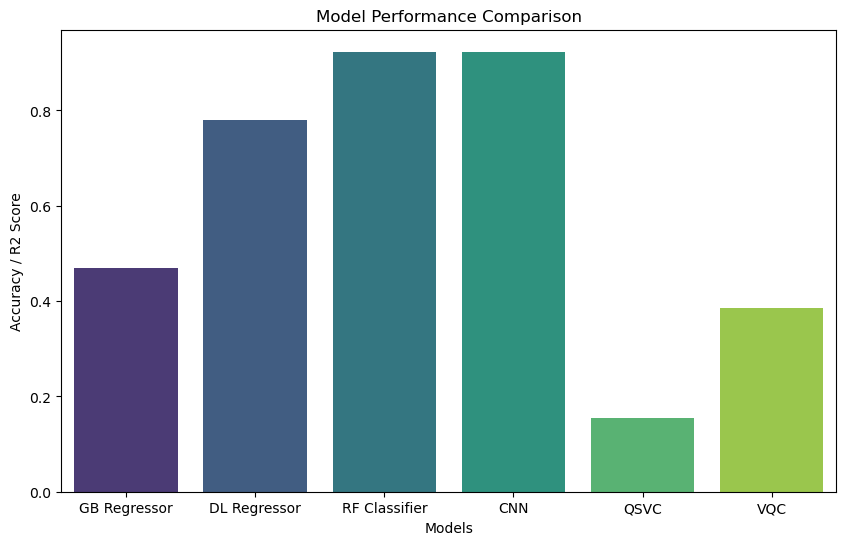

In [28]:
# --- Model Comparison ---
models = ['GB Regressor', 'DL Regressor', 'RF Classifier', 'CNN', 'QSVC', 'VQC']
metrics = [regression_r2_gb, regression_r2_dl, classification_accuracy_rf, classification_accuracy_cnn, quantum_accuracy_qsvc, quantum_accuracy_vqc]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=metrics, palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy / R2 Score")
plt.xlabel("Models")
plt.show()